In [322]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'TrainingData.csv'
df = pd.read_csv(Location)
df.head()

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [5]:
len(df.chunkID.unique()) #there are 208 unique chunks of data

208

In [ ]:
#just to see what the data looks like to graph each chunk

In [325]:
''''''for i, group in df.groupby('chunkID'):
    group.plot(x='position_within_chunk', y='target_4_6006', title=str(i))'''

SyntaxError: invalid syntax (<ipython-input-325-bb3b185d1487>, line 1)

In [ ]:
# each chunk starts at different time, can't see time of day or day of week effects

In [ ]:
# to see time of day or day of week effects, need to graph them on same time scale. have to put the data on a 
#normalized time scale.

In [28]:
type('chunkID')

str

In [32]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'TrainingData.csv'
df = pd.read_csv(Location)
df.head()

dow = {'Sunday': 0,
             'Monday': 1,
             'Tuesday': 2,
             'Wednesday': 3,
             'Thursday': 4,
             'Friday': 5,
             'Saturday': 6}
df['dayofweek'] = df['weekday'].map(dow) # convert dayofweek to number
df['chunk_in_hour'] = df.dayofweek * 24 + df.hour  #create new column for hour within "normalized" time span, except from the second sunday onward.
df.head()

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003,dayofweek,chunk_in_hour
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN,6,165
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN,6,166
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN,6,167
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN,0,0
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN,0,1


In [9]:
df['zero_chunkhr'] = df.chunk_in_hour.map( lambda x: 1 if x == 0 else 0)
df['x'] = df.groupby('chunkID')['zero_chunkhr'].transform(sum)
df.head()

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003,dayofweek,chunk_in_hour,zero_chunkhr,x
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.341606,2.138792,3.013752,NaN,5.679280,NaN,6,165,0,2
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,1.195779,2.722099,3.888712,NaN,7.426751,NaN,6,166,0,2
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.409658,3.110970,3.888712,NaN,7.683732,NaN,6,167,0,2
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,1.477711,2.041574,3.208188,NaN,4.831243,NaN,0,0,1,2
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,1.458267,2.138792,3.499841,NaN,4.625658,NaN,0,1,0,2


In [34]:
df2.head()

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003,dayofweek,chunk_in_hour,zero_pos
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN,0,0,4
286,359,2,95,10,Sunday,0,0.01,288.0,NaN,2.4,...,NaN,NaN,0.777742,0.777742,NaN,2.929583,NaN,0,0,95
386,555,3,27,6,Sunday,0,0.01,77.0,NaN,1.3,...,NaN,0.379149,0.583307,0.291653,NaN,1.002226,NaN,0,0,27
798,1159,5,103,9,Sunday,0,0.01,81.0,81.0,1.2,...,1.112597,1.079118,0.291653,0.486089,NaN,0.411170,NaN,0,0,103
895,1328,6,8,7,Sunday,0,0.01,240.0,NaN,2.8,...,NaN,NaN,0.291653,0.486089,NaN,0.282679,NaN,0,0,8


In [35]:
df3.head()

,chunkID,zero_pos
3,1,4
286,2,95
386,3,27
798,5,103
895,6,8


In [38]:
df4.head()

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003,dayofweek,chunk_in_hour,zero_pos,y,normlized_time
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,2.138792,3.013752,NaN,5.679280,NaN,6,165,4,0,165.0
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.722099,3.888712,NaN,7.426751,NaN,6,166,4,0,166.0
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,3.110970,3.888712,NaN,7.683732,NaN,6,167,4,0,167.0
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.041574,3.208188,NaN,4.831243,NaN,0,0,4,1,168.0
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.138792,3.499841,NaN,4.625658,NaN,0,1,4,1,169.0


In [ ]:
df2['zero_pos'] = df[df['chunk_in_hour']==0]['position_within_chunk']

In [43]:
df_filt = df[df['chunk_in_hour'] == 0]
df2 = df_filt.drop_duplicates(subset=['chunkID'],keep='first')
df2['zero_pos'] = df2['position_within_chunk']
df3 = df2[['chunkID','zero_pos']]
df3
df4 = df.merge(df3)
df4['y'] = (df4['position_within_chunk']+((168-df4['zero_pos'])) )// 168

df4['normalized_time'] = ( df4['y']*168 )+ df['chunk_in_hour']
df4.head()

/Users/jtlam/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003,dayofweek,chunk_in_hour,zero_pos,y,normalized_time
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,2.138792,3.013752,NaN,5.679280,NaN,6,165,4,0,165.0
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.722099,3.888712,NaN,7.426751,NaN,6,166,4,0,166.0
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,3.110970,3.888712,NaN,7.683732,NaN,6,167,4,0,167.0
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.041574,3.208188,NaN,4.831243,NaN,0,0,4,1,168.0
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.138792,3.499841,NaN,4.625658,NaN,0,1,4,1,169.0


In [73]:
list(df4)

['rowID',
 'chunkID',
 'position_within_chunk',
 'month_most_common',
 'weekday',
 'hour',
 'Solar.radiation_64',
 'WindDirection..Resultant_1',
 'WindDirection..Resultant_1018',
 'WindSpeed..Resultant_1',
 'WindSpeed..Resultant_1018',
 'Ambient.Max.Temperature_14',
 'Ambient.Max.Temperature_22',
 'Ambient.Max.Temperature_50',
 'Ambient.Max.Temperature_52',
 'Ambient.Max.Temperature_57',
 'Ambient.Max.Temperature_76',
 'Ambient.Max.Temperature_2001',
 'Ambient.Max.Temperature_3301',
 'Ambient.Max.Temperature_6005',
 'Ambient.Min.Temperature_14',
 'Ambient.Min.Temperature_22',
 'Ambient.Min.Temperature_50',
 'Ambient.Min.Temperature_52',
 'Ambient.Min.Temperature_57',
 'Ambient.Min.Temperature_76',
 'Ambient.Min.Temperature_2001',
 'Ambient.Min.Temperature_3301',
 'Ambient.Min.Temperature_6005',
 'Sample.Baro.Pressure_14',
 'Sample.Baro.Pressure_22',
 'Sample.Baro.Pressure_50',
 'Sample.Baro.Pressure_52',
 'Sample.Baro.Pressure_57',
 'Sample.Baro.Pressure_76',
 'Sample.Baro.Pressure_200

In [ ]:
for i, group in df4.groupby('chunkID'):
    plt.figure()
    group.plot(x='normalized_time', y='target_8_4002', kind ='scatter',title=str(i))

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


210

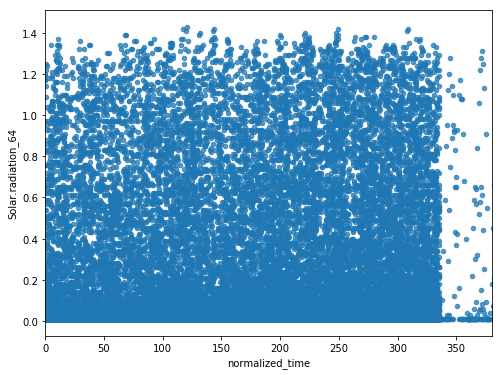

In [76]:
groups = df4.groupby('chunkID')

fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0, 380)
for k, v in groups:
    v.plot(x='normalized_time', y='Solar.radiation_64',kind ='scatter',label=k, alpha=.75, ax=ax, legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend()
k

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


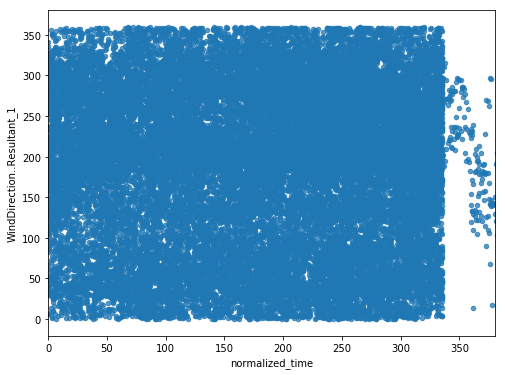

In [75]:
groups = df4.groupby('chunkID')

fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0, 380)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1',kind ='scatter',label=k, alpha=.75, ax=ax,legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [141]:
type(v)

pandas.core.frame.DataFrame

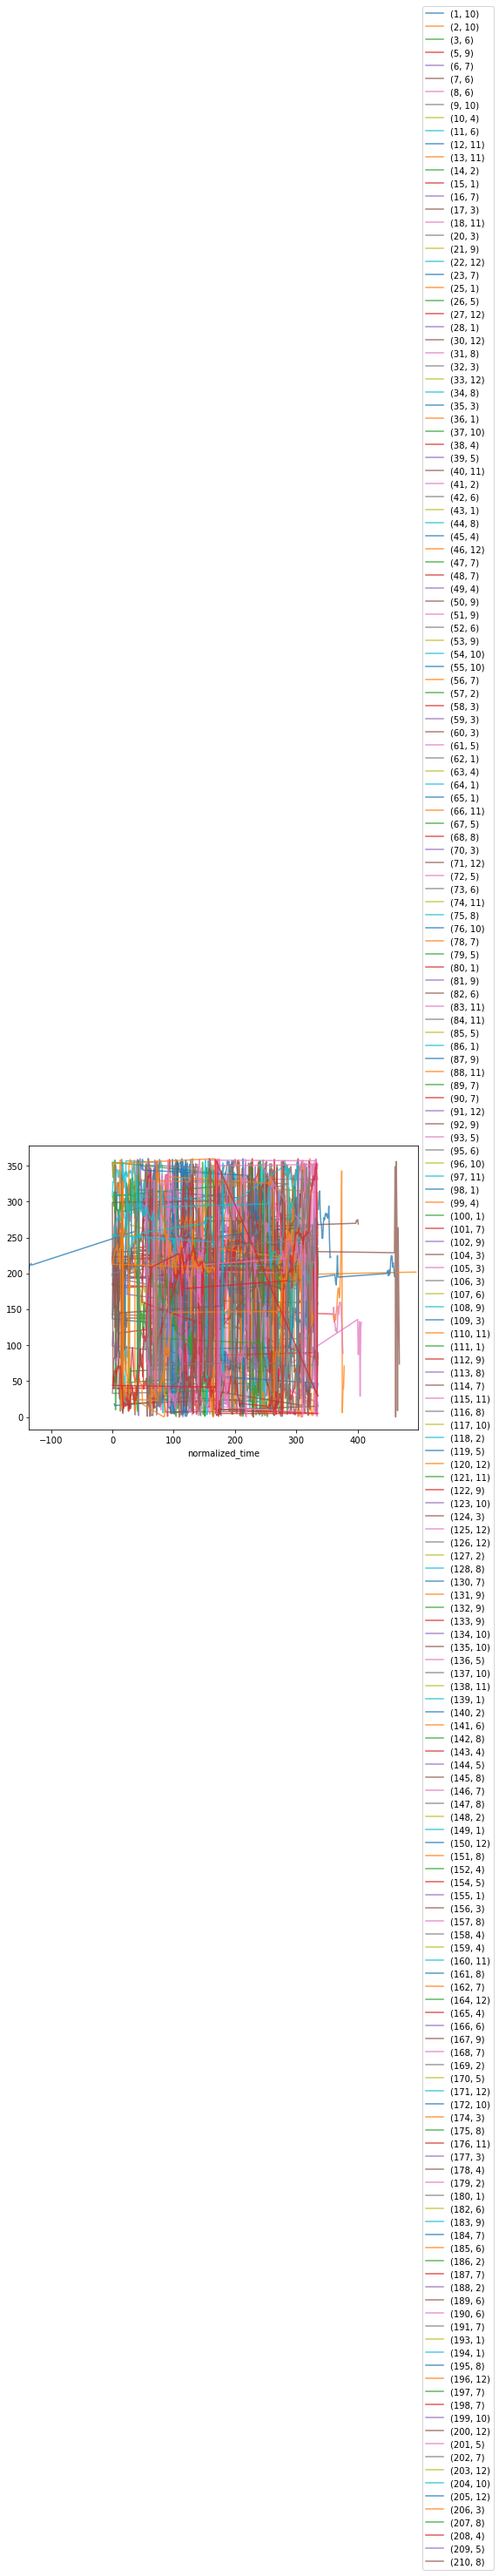

In [159]:
groups = df4.groupby(['chunkID','month_most_common'])

fig, ax = plt.subplots(figsize=(8,6))
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='line',label=k, alpha=.75, ax=ax, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

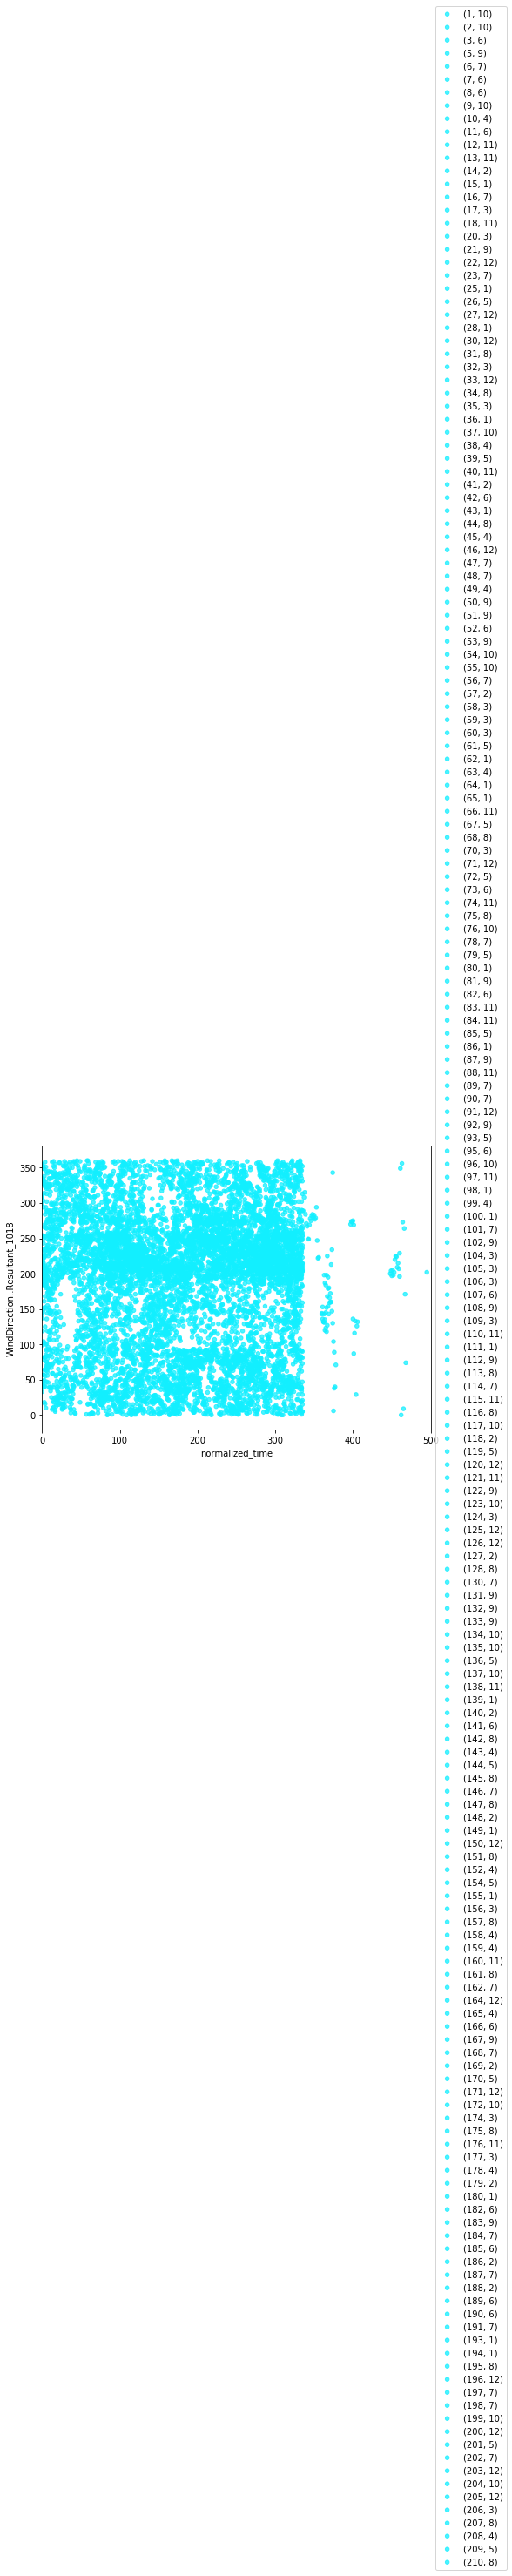

In [158]:
groups = df4.groupby(['chunkID','month_most_common'])

fig, ax = plt.subplots(figsize=(8,6))
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='scatter',c=df4.month_most_common.apply(lambda x: colors[x]),label=k, alpha=.75, ax=ax, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

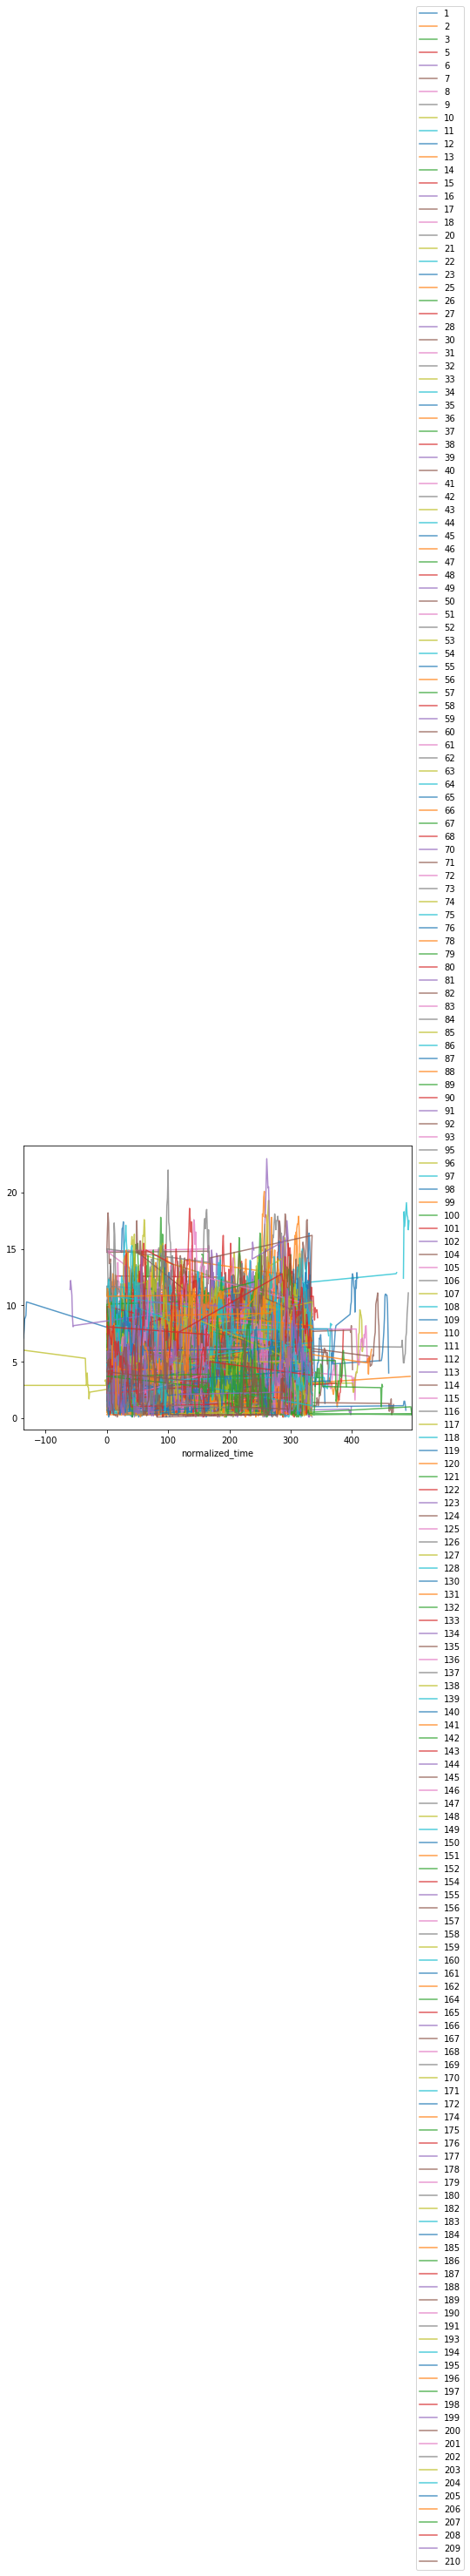

In [114]:
groups = df4.groupby('chunkID')

fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0, 380)
for k, v in groups:
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1',kind ='line',label=k, alpha=.75, ax=ax, legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Wind


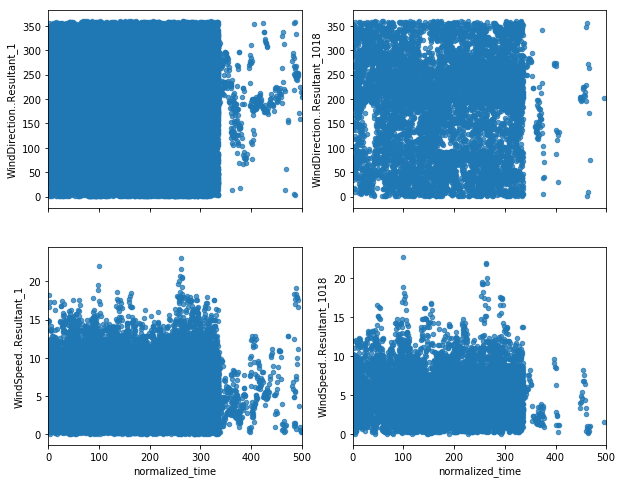

In [160]:

groups = df4.groupby('chunkID')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10,8),nrows=2, ncols=2, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1018',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
print('Wind')

Ambient Max Temperature


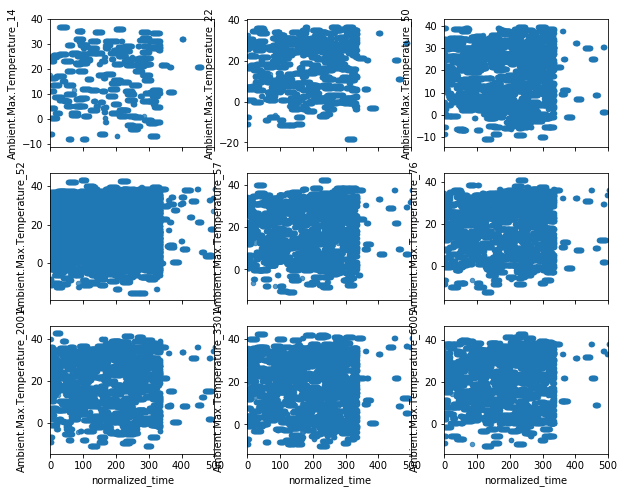

In [162]:
groups = df4.groupby('chunkID')

fig, ((ax1, ax2, ax3), (ax4, ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(figsize=(10,8),nrows=3, ncols=3, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_14',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_22',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_50',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_52',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_57',kind ='scatter',label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_76',kind ='scatter',label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_2001',kind ='scatter',label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_3301',kind ='scatter',label=k, alpha=.75, ax=ax8, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_6005',kind ='scatter',label=k, alpha=.75, ax=ax9, legend=False)
print('Ambient Max Temperature')

In [99]:
'''
for i, group in df4.groupby('chunkID'):
    plt.figure()
    group.plot(x='normalized_time', y='target_8_4002', kind ='scatter',title=str(i))
    
'''

"\nfor i, group in df4.groupby('chunkID'):\n    plt.figure()\n    group.plot(x='normalized_time', y='target_8_4002', kind ='scatter',title=str(i))\n    \n"

Target 11


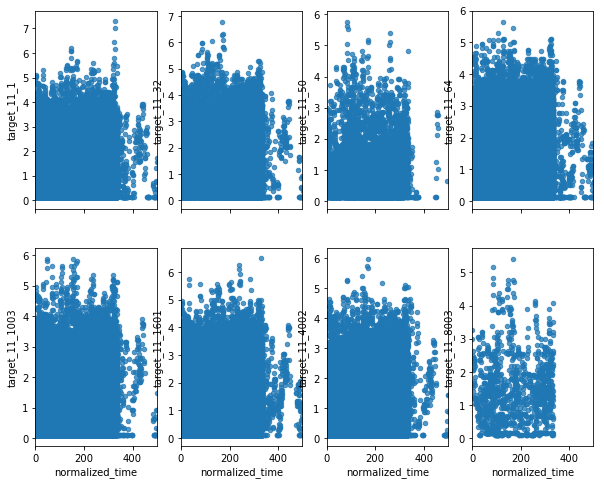

In [164]:
groups = df4.groupby('chunkID')

fig, ((ax1, ax2, ax3, ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(figsize=(10,8),nrows=2, ncols=4, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_11_1',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_11_32',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_11_50',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_11_64',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_11_1003',kind ='scatter',label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_11_1601',kind ='scatter',label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='target_11_4002',kind ='scatter',label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='target_11_8003',kind ='scatter',label=k, alpha=.75, ax=ax8, legend=False)
print('Target 11')   

Target 3


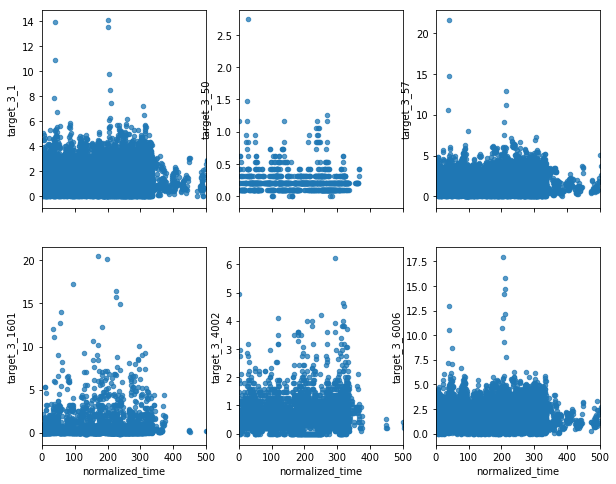

In [165]:
groups = df4.groupby('chunkID')

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(figsize=(10,8),nrows=2, ncols=3, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_3_1',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_3_50',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_3_57',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_3_1601',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_3_4002',kind ='scatter',label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_3_6006',kind ='scatter',label=k, alpha=.75, ax=ax6, legend=False)
print('Target 3')    

Target 4


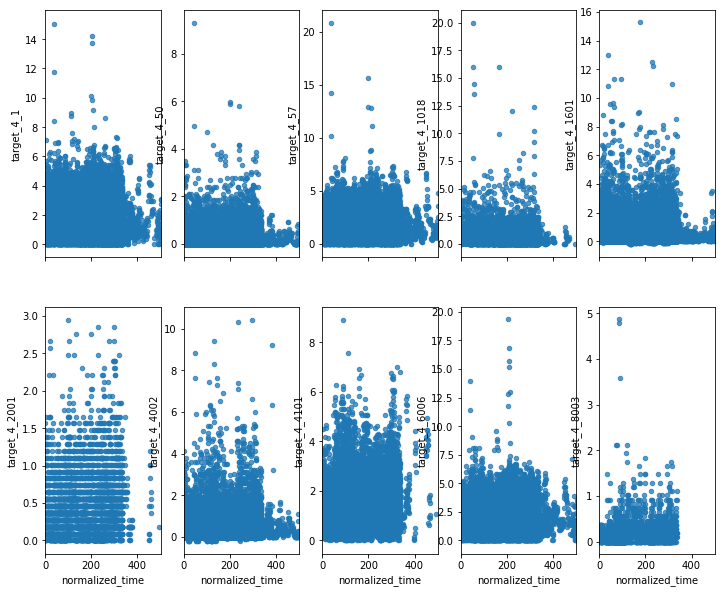

In [166]:
groups = df4.groupby('chunkID')

fig, ((ax1, ax2, ax3,ax4, ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(figsize=(12,10),nrows=2, ncols=5, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_4_1',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_4_50',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_4_57',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_4_1018',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_4_1601',kind ='scatter',label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_4_2001',kind ='scatter',label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='target_4_4002',kind ='scatter',label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='target_4_4101',kind ='scatter',label=k, alpha=.75, ax=ax8, legend=False)
    v.plot(x='normalized_time', y='target_4_6006',kind ='scatter',label=k, alpha=.75, ax=ax9, legend=False)
    v.plot(x='normalized_time', y='target_4_8003',kind ='scatter',label=k, alpha=.75, ax=ax10, legend=False)
print('Target 4')

Target 8


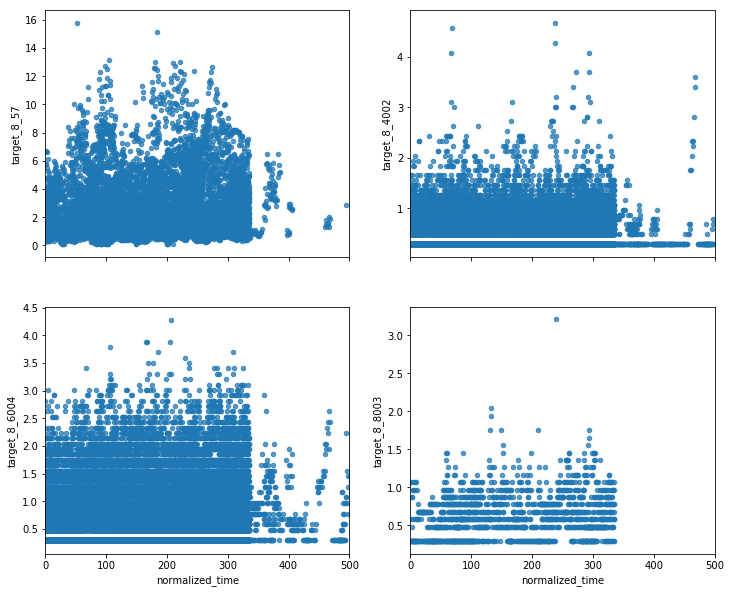

In [167]:
groups = df4.groupby('chunkID')

fig, ((ax1, ax2),( ax3,ax4)) = plt.subplots(figsize=(12,10),nrows=2, ncols=2, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_8_57',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_8_4002',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_8_6004',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_8_8003',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
print('Target 8')    

Miscellaneous Targets


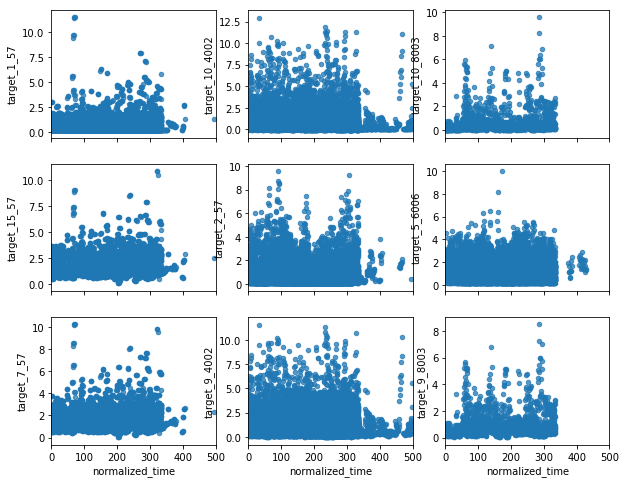

In [168]:
groups = df4.groupby('chunkID')

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(figsize=(10,8),nrows=3, ncols=3, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_1_57',kind ='scatter',label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_10_4002',kind ='scatter',label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_10_8003',kind ='scatter',label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_15_57',kind ='scatter',label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_2_57',kind ='scatter',label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_5_6006',kind ='scatter',label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='target_7_57',kind ='scatter',label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='target_9_4002',kind ='scatter',label=k, alpha=.75, ax=ax8, legend=False)
    v.plot(x='normalized_time', y='target_9_8003',kind ='scatter',label=k, alpha=.75, ax=ax9, legend=False)
print('Miscellaneous Targets')   